<a href="https://colab.research.google.com/github/AdrianoHKim/Soulcode/blob/main/notebooks/notebook_2_1_cap_instalada_por_regiao_e_uf_tratado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Alunos: Adriano Kim, José Aurelio, Marcos Paulo, Paulo Vitorino e Renato Costa e Wesley Luiz**

Professores: Douglas Ribeiro, Franciane Rodrigues e

# Base de Dados Informações gerais
A Empresa de Pesquisa Energética (EPE) apresenta o Anuário Estatístico de Energia Elétrica, que traz as informações relativas à cadeia de energia elétrica do Brasil, bem como informações regionais e das unidades federativas.

Este Anuário resulta da compilação de dados dos anos de 2013 a 2022, coletados e consolidados pela EPE ao longo de 2023. Cumpre ressaltar que os dados apresentados não contemplam a parcela consumida em unidades autoprodutoras de energia elétrica.Realizado no âmbito da Comissão Permanente de Análise e Acompanhamento do Mercado de Energia Elétrica (COPAM), sob a coordenação da EPE.

Os dados relativos à capacidade instalada e geração de energia elétrica são obtidos pelo sistema de informações de geração da Associação Nacional de Energia Elétrica(ANEEL) e pelo Balanço Energético Nacional (BEN).

Fonte: hhttps://dashboard.epe.gov.br/apps/anuario-livro/#Apresenta%C3%A7%C3%A3o


## **Dicionário de dados**

### Base de dados: Capacidade instalada e geração por região e UF

* Cap. Instalada (MW) : Representa a capacidade instalada máxima de energia gerada por uma usina elétrica, medida em megawatts (MW)  
* Geração (GWh): Indica a quantidade real de energia gerada por uma usina elétrica durante um período específico, medida em gigawatt-horas (GWh)






# ETL
Extração, transformação, carregamento dos dados



## Instalações e bibliotecas
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [ ]:
# instalaçao de biblioteca para interagir com google cloud
!pip install gcsfs

In [ ]:
# instalaçao de biblioteca para validar dados com pandera
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
#Importando bibliotecas
import os
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from google.cloud import storage
from oauth2client.client import GoogleCredentials

In [ ]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

## Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projeto-final-ad2-e8-ae566c3a2c2b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Conexão com a bucket do Google Cloud

client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8') # nome do bucket
bucket.blob('projeto-final-ad2-e8/dados/brutos/excel/2_1_cap_instalada_por_regiao_e_uf.xlsx ') # nome do arquivo
path = 'gs://projeto-final-ad2-e8/dados/brutos/excel/2_1_cap_instalada_por_regiao_e_uf.xlsx' # gsutil



In [ ]:
# Leitura e configuração dos arquivos extraidos
df = pd.read_excel(path)

### Pré Análise

In [ ]:
# Visualização geral
df

,grupo,macro_grupo,ano,tipo_de_informacao,total
0,Brasil,Brasil,2013,Cap. Instalada (MW),126743.303060
1,Brasil,Brasil,2013,Geração (GWh),570834.647328
2,Brasil,Brasil,2014,Cap. Instalada (MW),133912.521110
3,Brasil,Brasil,2014,Geração (GWh),590542.338656
4,Brasil,Brasil,2015,Cap. Instalada (MW),140857.748378
...,...,...,...,...,...
555,Santa Catarina,Sul,2020,Geração (GWh),16590.335429
556,Santa Catarina,Sul,2021,Cap. Instalada (MW),5817.516860
557,Santa Catarina,Sul,2021,Geração (GWh),20602.443775
558,Santa Catarina,Sul,2022,Cap. Instalada (MW),5953.170600


In [ ]:
# Visualização de forma aleatoria
df.sample(3)

,grupo,macro_grupo,ano,tipo_de_informacao,total
173,Maranhão,Nordeste,2019,Geração (GWh),13209.177047
207,Pernambuco,Nordeste,2016,Geração (GWh),10997.703624
473,Rio de Janeiro,Sudeste,2019,Geração (GWh),51724.838581


In [ ]:
# Tamanho total de (linhas , colunas)
df.shape

(560, 5)

In [ ]:
# Todos os tipos de dados presentes
df.dtypes

grupo                  object
macro_grupo            object
ano                     int64
tipo_de_informacao     object
total                 float64
dtype: object

In [ ]:
# Contagem de observações para cada coluna
df.count()

grupo                 560
macro_grupo           560
ano                   560
tipo_de_informacao    560
total                 560
dtype: int64

In [ ]:
# Informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grupo               560 non-null    object 
 1   macro_grupo         560 non-null    object 
 2   ano                 560 non-null    int64  
 3   tipo_de_informacao  560 non-null    object 
 4   total               560 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [ ]:
# Backup local
dfbackup1 = df.copy()

In [ ]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos

for coluna in df:
    valor = (df[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
                Valores únicos para o atributo grupo:                 
----------------------------------------------------------------------

['Brasil' 'Distrito Federal' 'Goiás' 'Mato Grosso' 'Mato Grosso do Sul'
 'Alagoas' 'Bahia' 'Ceará' 'Maranhão' 'Paraíba' 'Pernambuco' 'Piauí'
 'Rio Grande do Norte' 'Sergipe' 'Acre' 'Amapá' 'Amazonas' 'Pará'
 'Rondônia' 'Roraima' 'Tocantins' 'Espírito Santo' 'Minas Gerais'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Rio Grande do Sul'
 'Santa Catarina']

----------------------------------------------------------------------
----------------------------------------------------------------------
             Valores únicos para o atributo macro_grupo:              
----------------------------------------------------------------------

['Brasil' 'Centro-Oeste' 'Nordeste' 'Norte' 'Sudeste' 'Sul']

----------------------------------------------------------------------
----------------

## Transformação
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

### Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

In [ ]:
# Verificar se há valores duplicados
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
555    False
556    False
557    False
558    False
559    False
Length: 560, dtype: bool

In [ ]:
# Verificar se há valores nulos/ausentes
df.isnull().sum()

grupo                 0
macro_grupo           0
ano                   0
tipo_de_informacao    0
total                 0
dtype: int64

In [ ]:
#Backup
backup_bruto = df.copy()

### Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

Tipagem

In [ ]:
#Criando um dataframe para realizar normalização dos dados
df_analise = df.copy()

In [ ]:
# Convertendo a coluna 'ano' para datetime
df_analise['ano'] = pd.to_datetime(df_analise['ano'], format='%Y')

In [ ]:
# Extraindo o ano usando o atributo .dt.year
df_analise.ano.astype('datetime64[ns]')
df_analise.ano.dt.year

0      2013
1      2013
2      2014
3      2014
4      2015
       ... 
555    2020
556    2021
557    2021
558    2022
559    2022
Name: ano, Length: 560, dtype: int64

In [ ]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   grupo               560 non-null    object        
 1   macro_grupo         560 non-null    object        
 2   ano                 560 non-null    datetime64[ns]
 3   tipo_de_informacao  560 non-null    object        
 4   total               560 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 22.0+ KB


Tradução

In [ ]:
# Examinando se as colunas foram alteradas
df.dtypes

grupo                  object
macro_grupo            object
ano                     int64
tipo_de_informacao     object
total                 float64
dtype: object

In [ ]:
# Renomeando nomes de colunas

traducao = {
    'grupo': 'Grupo',
    'macro_grupo': 'Macro_grupo',
    'ano':'Ano',
    'tipo_de_informacao':'Tipo_de_informacao',
    'total': 'Total',
}
df_analise.rename(columns=traducao,inplace=True)

In [ ]:
#Visualização do cabeçalho após a normalização
df_analise.head(1)

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
0,Brasil,Brasil,2013-01-01,Cap. Instalada (MW),126743.30306


In [ ]:
# Examinando se os registros foram alterados
#pd.unique(df.traducao)

# **Qualidade e integridade dos dados**

### **Validação da estrutura dos dados (schema)**

In [ ]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Grupo               560 non-null    object        
 1   Macro_grupo         560 non-null    object        
 2   Ano                 560 non-null    datetime64[ns]
 3   Tipo_de_informacao  560 non-null    object        
 4   Total               560 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 22.0+ KB


In [ ]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'Grupo': pa.Column(pa.String),
    'Macro_grupo': pa.Column(pa.String),
    'Ano': pa.Column(pa.DateTime),
    'Tipo_de_informacao': pa.Column(pa.String),
    'Total': pa.Column(pa.Float)
})

schema.validate(df_analise)

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
0,Brasil,Brasil,2013-01-01,Cap. Instalada (MW),126743.303060
1,Brasil,Brasil,2013-01-01,Geração (GWh),570834.647328
2,Brasil,Brasil,2014-01-01,Cap. Instalada (MW),133912.521110
3,Brasil,Brasil,2014-01-01,Geração (GWh),590542.338656
4,Brasil,Brasil,2015-01-01,Cap. Instalada (MW),140857.748378
...,...,...,...,...,...
555,Santa Catarina,Sul,2020-01-01,Geração (GWh),16590.335429
556,Santa Catarina,Sul,2021-01-01,Cap. Instalada (MW),5817.516860
557,Santa Catarina,Sul,2021-01-01,Geração (GWh),20602.443775
558,Santa Catarina,Sul,2022-01-01,Cap. Instalada (MW),5953.170600


## Copia de segurança do tratamento - Backup

In [ ]:
# Backup para analise
df_tratado = df_analise.copy()

## Carregamento
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [ ]:
# Upando para o Google Cloud

#df_tratado.to_csv('gs://projeto-final-ad2-e8/dados/tratados/dataset_tratados_xlsx/2_1_cap_instalada_por_regiao_e_uf_tratado.xlsx', index=False)


# Análise exploratória de dados.
- Descrição de dados: identificação dos tipos de variáveis, dimensões dos dados, valores extremos e estatísticas descritivas.
- Visualização dos dados: criação de gráficos, tabelas e outros tipos de visualização para entender a distribuição e a relação entre as variáveis.
- Identificação de padrões: identificação de padrões, tendências, correlações e outras relações entre as variáveis.
- Testes estatísticos: aplicação de testes estatísticos para confirmar ou refutar hipóteses sobre os dados.

## **Estatisticas**

In [ ]:
#Estatística descriva
df_tratado.describe()

,Total
count,560.000000
mean,27427.153327
std,83027.697857
min,37.620000
25%,2489.672550
50%,8320.111600
75%,20325.657500
max,677436.870162


### Filtros e agrupamentos
Criar novas variáveis com base nos dados originais para permitir uma análise mais detalhada por agrupamento.

In [ ]:
# Filtrar apenas as linhas onde Macro_grupo não é 'Brasil'
cap_instalada_df = cap_instalada_df[cap_instalada_df['Macro_grupo'] != 'Brasil']

#Groupby por "Grupo" e somar as capacidades instaladas (Cap. Instalada (MW)) para cada grupo:
grouped_by_grupo_cap_instalada = cap_instalada_df[df_tratado['Tipo_de_informacao'] == 'Cap. Instalada (MW)'].groupby('Grupo')['Total'].sum()
print(grouped_by_grupo_cap_instalada)


Grupo
Acre                     1506.056140
Alagoas                 40453.498645
Amapá                    7596.231690
Amazonas                22907.068469
Bahia                  102029.617078
Ceará                   40114.826205
Distrito Federal          447.151419
Espírito Santo          24558.711330
Goiás                   81196.045329
Maranhão                32373.079286
Mato Grosso             48443.040524
Mato Grosso do Sul      58056.771632
Minas Gerais           139048.609243
Paraná                 177944.374568
Paraíba                  9082.801331
Pará                   152994.036026
Pernambuco              33677.497042
Piauí                   19897.741888
Rio Grande do Norte     43191.223073
Rio Grande do Sul       82232.193011
Rio de Janeiro         100769.240814
Rondônia                71341.829949
Roraima                  2753.247796
Santa Catarina          56074.700643
Sergipe                 21684.564248
São Paulo              192380.150290
Tocantins               24639.94

In [ ]:
# Filtrar apenas as linhas onde Macro_grupo não é 'Brasil'
cap_instalada_df = cap_instalada_df[cap_instalada_df['Macro_grupo'] != 'Brasil']

# Groupby por "Grupo" e somar as capacidades instaladas (Cap. Instalada (MW)) para cada grupo:
grouped_by_grupo_cap_instalada = cap_instalada_df.groupby('Grupo')['Total'].sum()

print(grouped_by_grupo_cap_instalada)

Grupo
Acre                     1506.056140
Alagoas                 40453.498645
Amapá                    7596.231690
Amazonas                22907.068469
Bahia                  102029.617078
Ceará                   40114.826205
Distrito Federal          447.151419
Espírito Santo          24558.711330
Goiás                   81196.045329
Maranhão                32373.079286
Mato Grosso             48443.040524
Mato Grosso do Sul      58056.771632
Minas Gerais           139048.609243
Paraná                 177944.374568
Paraíba                  9082.801331
Pará                   152994.036026
Pernambuco              33677.497042
Piauí                   19897.741888
Rio Grande do Norte     43191.223073
Rio Grande do Sul       82232.193011
Rio de Janeiro         100769.240814
Rondônia                71341.829949
Roraima                  2753.247796
Santa Catarina          56074.700643
Sergipe                 21684.564248
São Paulo              192380.150290
Tocantins               24639.94

In [ ]:
# Filtrar apenas as linhas de Geração (GWh)
geracao_df = df_tratado[df_tratado['Tipo_de_informacao'] == 'Cap. Instalada (MW)']

# Filtrar apenas as linhas onde Macro_grupo não é 'Brasil'
geracao_df = geracao_df[geracao_df['Macro_grupo'] != 'Brasil']

# Groupby por Macro_grupo e calcular a média da geração
grouped_by_macro_grupo_geracao_media = geracao_df.groupby('Macro_grupo')['Total'].mean()

print(grouped_by_macro_grupo_geracao_media)

Macro_grupo
Centro-Oeste     4703.575223
Nordeste         3805.609431
Norte            4053.405990
Sudeste         11418.917792
Sul             10541.708941
Name: Total, dtype: float64


In [ ]:
# Filtrar apenas as linhas de Geração (GWh)
geracao_df = df_tratado[df_tratado['Tipo_de_informacao'] == 'Geração (GWh)']

# Filtrar apenas as linhas onde Macro_grupo não é 'Brasil'
geracao_df = geracao_df[geracao_df['Macro_grupo'] != 'Brasil']

# Groupby por Macro_grupo e calcular a média da geração
grouped_by_macro_grupo_geracao_media = geracao_df.groupby('Macro_grupo')['Total'].mean()

print(grouped_by_macro_grupo_geracao_media)



Macro_grupo
Centro-Oeste    17602.128590
Nordeste        12024.439031
Norte           14783.182620
Sudeste         45245.372979
Sul             48709.543859
Name: Total, dtype: float64


In [ ]:
# Filtrar apenas as linhas de Cap. Instalada (MW)
cap_instalada_df = df_tratado[df_tratado['Tipo_de_informacao'] == 'Cap. Instalada (MW)']

# Filtrar apenas as linhas onde Macro_grupo não é 'Brasil'
cap_instalada_df = cap_instalada_df[cap_instalada_df['Macro_grupo'] != 'Brasil']

# Groupby por Ano e Macro_grupo e calcular a soma total da capacidade instalada e energia instalada
grouped_data = cap_instalada_df.groupby(['Ano', 'Macro_grupo'])[['Total']].sum()

print(grouped_data)

                                Total
Ano        Macro_grupo               
2013-01-01 Centro-Oeste  15922.912030
           Nordeste      22136.832910
           Norte         16869.026580
           Sudeste       42204.334380
           Sul           29610.197160
2014-01-01 Centro-Oeste  16138.748380
           Nordeste      24993.045110
           Norte         19754.149290
           Sudeste       43131.386810
           Sul           29895.191520
2015-01-01 Centro-Oeste  17267.683380
           Nordeste      26883.081480
           Norte         21497.387080
           Sudeste       44111.767098
           Sul           31097.829340
2016-01-01 Centro-Oeste  18577.025820
           Nordeste      29802.954350
           Norte         25460.618830
           Sudeste       44811.647080
           Sul           31685.331080
2017-01-01 Centro-Oeste  19226.751225
           Nordeste      32504.931736
           Norte         28310.706448
           Sudeste       45212.397088
           S

In [ ]:
filtro_brasil = df_tratado.loc[df_tratado.Grupo != 'Brasil']
filtro_brasil

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
20,Distrito Federal,Centro-Oeste,2013-01-01,Cap. Instalada (MW),47.006000
21,Distrito Federal,Centro-Oeste,2013-01-01,Geração (GWh),129.214009
22,Distrito Federal,Centro-Oeste,2014-01-01,Cap. Instalada (MW),47.379910
23,Distrito Federal,Centro-Oeste,2014-01-01,Geração (GWh),127.053057
24,Distrito Federal,Centro-Oeste,2015-01-01,Cap. Instalada (MW),53.324000
...,...,...,...,...,...
555,Santa Catarina,Sul,2020-01-01,Geração (GWh),16590.335429
556,Santa Catarina,Sul,2021-01-01,Cap. Instalada (MW),5817.516860
557,Santa Catarina,Sul,2021-01-01,Geração (GWh),20602.443775
558,Santa Catarina,Sul,2022-01-01,Cap. Instalada (MW),5953.170600


## Visualização

In [ ]:
df_tratado.head()

,Grupo,Macro_grupo,Ano,Tipo_de_informacao,Total
0,Brasil,Brasil,2013-01-01,Cap. Instalada (MW),126743.303060
1,Brasil,Brasil,2013-01-01,Geração (GWh),570834.647328
2,Brasil,Brasil,2014-01-01,Cap. Instalada (MW),133912.521110
3,Brasil,Brasil,2014-01-01,Geração (GWh),590542.338656
4,Brasil,Brasil,2015-01-01,Cap. Instalada (MW),140857.748378


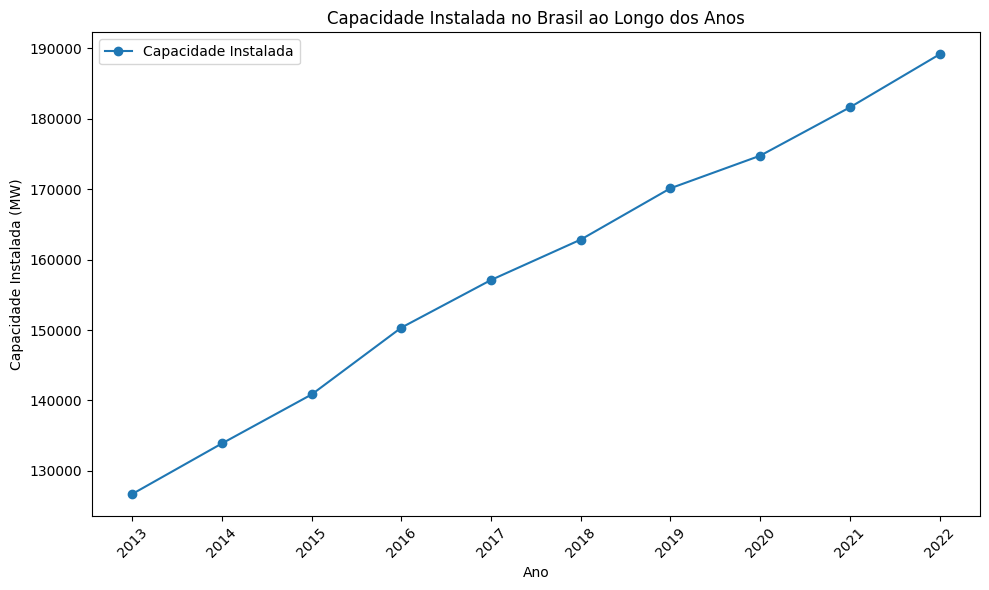

In [ ]:
# Filtrando os dados para Brasil e Cap. Instalada (MW)
brasil_capacidade = df_tratado[(df_tratado['Macro_grupo'] == 'Brasil') & (df_tratado['Tipo_de_informacao'] == 'Cap. Instalada (MW)')]
# Criando gráfico de linha para Capacidade Instalada no Brasil ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(brasil_capacidade['Ano'], brasil_capacidade['Total'], marker='o', label='Capacidade Instalada')
plt.xlabel('Ano')
plt.ylabel('Capacidade Instalada (MW)')
plt.title('Capacidade Instalada no Brasil ao Longo dos Anos')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo gráfico
plt.show()


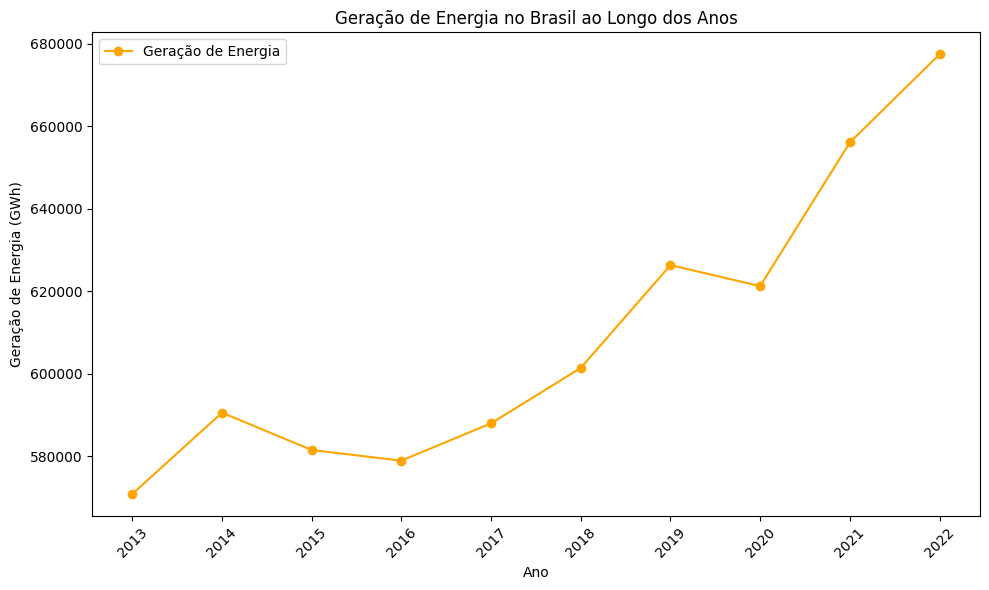

In [ ]:
# Filtrando os dados para Brasil e Geração (GWh)
brasil_geracao = df_tratado[(df_tratado['Macro_grupo'] == 'Brasil') & (df_tratado['Tipo_de_informacao'] == 'Geração (GWh)')]
# Criando gráfico de linha para Geração de Energia no Brasil ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(brasil_geracao['Ano'], brasil_geracao['Total'], marker='o', color='orange', label='Geração de Energia')
plt.xlabel('Ano')
plt.ylabel('Geração de Energia (GWh)')
plt.title('Geração de Energia no Brasil ao Longo dos Anos')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# Exibindo gráfico
plt.show()

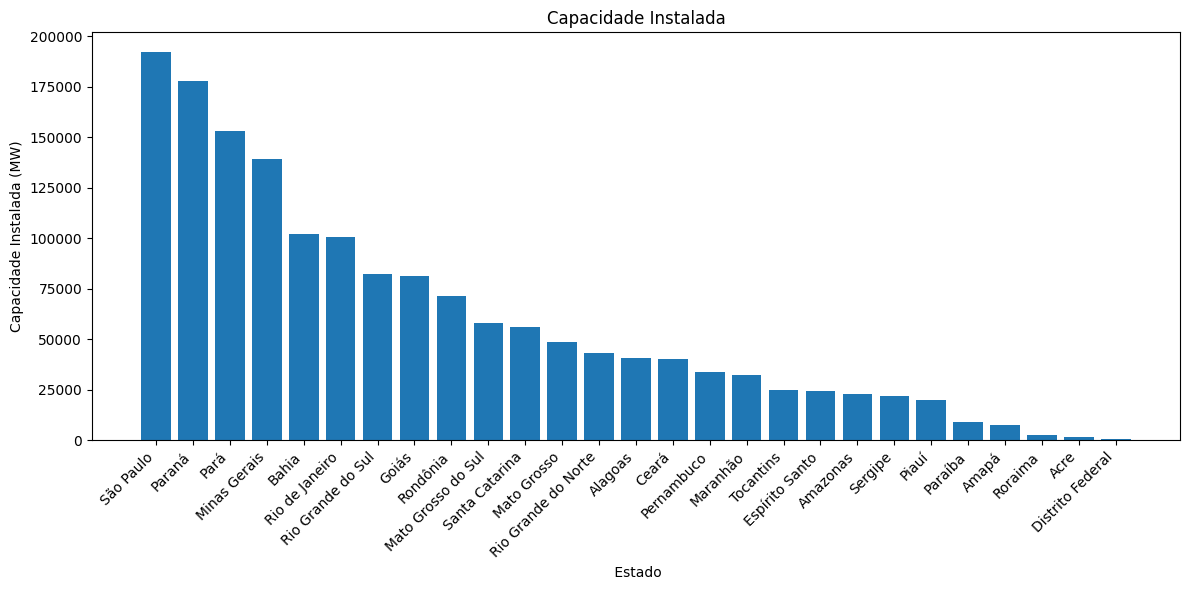

In [ ]:
# Filtrando os dados para Cap. Instalada (MW)
capacidade_instalada = filtro_brasil[filtro_brasil['Tipo_de_informacao'] == 'Cap. Instalada (MW)']

# Agrupando por região e estado e somando a capacidade instalada
capacidade_por_regiao_estado = capacidade_instalada.groupby(['Grupo', 'Macro_grupo']).sum()

# Reformatando o índice para facilitar a plotagem
capacidade_por_regiao_estado.reset_index(inplace=True)

# Ordenando o DataFrame em ordem decrescente de capacidade instalada
capacidade_por_regiao_estado = capacidade_por_regiao_estado.sort_values(by='Total', ascending=False)

# Criando gráfico de barras para Capacidade Instalada por Região e Estado
plt.figure(figsize=(12, 6))
plt.bar(capacidade_por_regiao_estado['Grupo'], capacidade_por_regiao_estado['Total'])
plt.xlabel(' Estado')
plt.ylabel('Capacidade Instalada (MW)')
plt.title('Capacidade Instalada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo gráfico
plt.show()

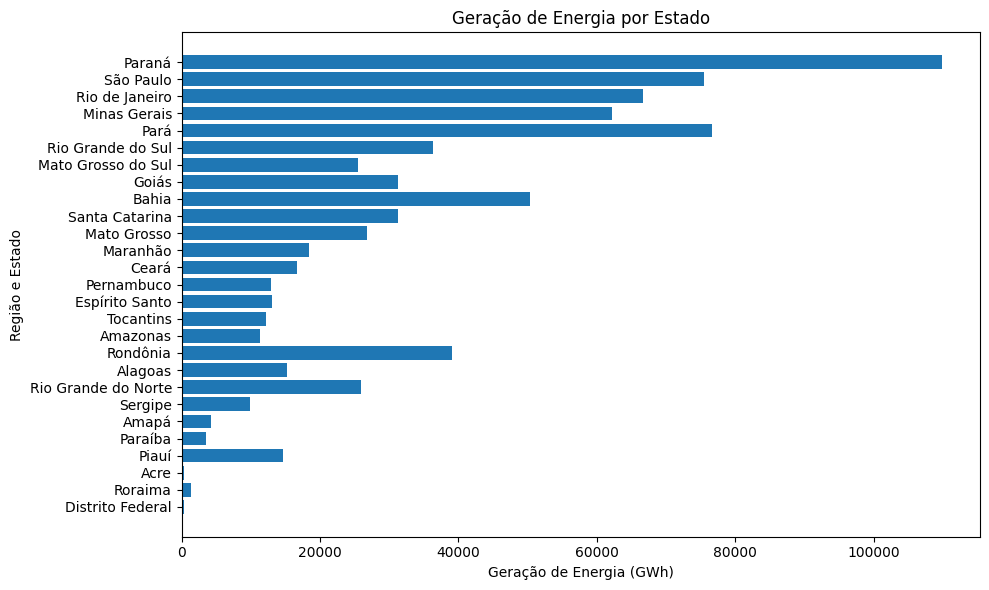

In [ ]:

# Filtrando os dados para Geração (GWh)
geracao_energia = filtro_brasil[(filtro_brasil['Tipo_de_informacao'] == 'Geração (GWh)')]

# Criando gráfico de barras horizontais para Geração de Energia por Região e Estado
plt.figure(figsize=(10, 6))

# Ordenando os dados em ordem decrescente para melhor visualização
geracao_energia = geracao_energia.sort_values(by='Total', ascending=True)

plt.barh(geracao_energia['Grupo'], geracao_energia['Total'])
plt.xlabel('Geração de Energia (GWh)')
plt.ylabel('Região e Estado')
plt.title('Geração de Energia por Estado')
plt.tight_layout()

# Exibindo gráfico
plt.show()